In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['font.family'] = 'SimHei'
from igraph import *
import pickle
import seaborn as sns
sns.set_theme(style="ticks")

In [3]:
usecols = ["stat_date", "uid", "onlinetime", "level", "upvote","onlinetime_list","corpid", "carteamid", "vclientip","country",
            "friend_num_plat", "friend_list_plat", "active_plat_num", "friend_num_game","friend_list_game", "active_game_num", "jiyounum", "lianrennum", "sidangnum", "guiminum",
            "jiyou", "lianren", "sidang", "guimi", "chg_intimacy", "avg_intimacy", "gender", "chat_num", "friend_chat_num", "send_gold_num",
            "draw_gold_num", "vote_num", "friend_vote_num", "give_gift_num", "get_gift_num", "recruit_num", "friend_recruit_num", 
            "reply_recruit_num", "team_num", "leader_team_num", "invite_team_num", "apply_relation_num", "reply_relation_num",
            "del_friend_num", "invite_carteam_num", "friend_carteam_num", "carteam_leaader_num", "accept_carteam_num", "corps_active_change",
            "uid_corp_active_change", "corps_level_change", "suc_match_num", "create_corp_num", "signup_num", "achievement_num", 
            "chat_uid_num", "friend_uid_num", "reject_friend_num", "del_friend_apply_num", "reject_relation_num", "del_intimacy_num",
            "exit_carteam_num", "kick_num", "bekick_num", "del_carteam_num", "transfer_carteam_num", "accept_invite_team_num",
            "reject_invite_team_num", "beaccept_invite_team_num", "bereject_invite_team_num", "beaccept_apply_team_num", 
            "bereject_apply_team_num", "accept_apply_team_num", "reject_apply_team_num", "join_corp_num", "space_req_num",
            "space_bereq_num", "space_gift_num", "space_gift_unum", "login_num", "login_days", "is_comeback", "playerlang", 
            "onlinetime_detail", "bevote_num", "corp_money_chg", "funny_mode_num", "funny_single_num", "funny_double_num", "funny_squad_num",
            "round_num", "avg_kill_count", "avg_hit_rate", "chicken_rate", "top10_rate", "avg_damage", "avg_box_num", "avg_survivaltime",
            "avg_moving", "head_shoot_rate", "avg_gun_kill", "avg_assist", "avg_healtimes", "avg_healamount", "avg_cure",
            "round_single_num", "round_double_num", "round_squad_num", "first_single_segment", "first_dou_segment", "first_squad_segment",
            "third_single_segment", "third_dou_segment", "third_squad_segment", "first_single_score", "first_dou_score", "first_squad_score", 
            "third_single_score", "third_dou_score", "third_squad_score", "systemhardware", "platid", "diamond_add_4week", "register_days", 
            "content_sample", "ratingvalueafterchanged", "final_score", "diamond_add", "diamond_reduce_4week", "diamond_reduce", 
            "classical_num", "funny_num", "tpp_num", "fpp_num", "solo_num", "duo_num", "squad_num", "funny_quick_num","funny_sniper_num",
            "funny_war_num", "segment", "classical_team_rate",  "avg_collectindex", "avg_fps",
            "funny_team_rate", "is_register_month", "last_login_date", "avg_hit_distance", "reward_num", "share_num", "register_time", 
            "is_vpn", "daily_buy_num", "game_start_num", "skin_num"
]
len(usecols)

155

In [4]:
personal = ["onlinetime", "level", "upvote","signup_num", "achievement_num","login_num", "login_days", "round_num",
            "round_squad_num","segment", "reward_num", "skin_num"]
relations = [ "friend_num_plat", "active_plat_num", "friend_num_game","active_game_num", "chat_num", "friend_chat_num",
            "send_gold_num", "draw_gold_num", "vote_num", "friend_vote_num","recruit_num", "friend_recruit_num", 
            "reply_recruit_num","team_num", "leader_team_num", "invite_team_num", "apply_relation_num", "reply_relation_num",
            "del_friend_num","reject_friend_num", "del_friend_apply_num", "reject_relation_num", "del_intimacy_num", "accept_invite_team_num",
            "reject_invite_team_num", "beaccept_invite_team_num", "bereject_invite_team_num", "beaccept_apply_team_num", 
            "bereject_apply_team_num", "accept_apply_team_num", "reject_apply_team_num"]
performance = ["avg_kill_count", "avg_hit_rate", "chicken_rate", "top10_rate", "avg_damage", "avg_box_num", "avg_survivaltime",
            "avg_moving", "head_shoot_rate", "avg_gun_kill", "avg_assist", "avg_healtimes", "avg_healamount", "avg_cure","avg_hit_distance",
              "final_score"]

In [5]:
normal_accounts_0628 = pd.read_csv("normal_data_fea_20210628.txt", sep="\t",
                                dtype={"stat_date":str, "uid":str,"corpid":str, "carteamid":str, 
                                       "friend_list_game":str, "friend_list_plat":str, 
                                       "jiyou":str,"lianren":str,"sidang":str,"guimi":str,
                                      "register_time":str, "last_login_date":str, "is_comeback":bool,
                                       "is_register_month":bool, "is_vpn":bool, "is_etc":bool}, 
                                usecols= usecols,
                               na_values=['-1','\\N'])

normal_accounts_0621 = pd.read_csv("20210621_normal_data_fea.txt", sep="\t",
                                dtype={"stat_date":str, "uid":str,"corpid":str, "carteamid":str, 
                                       "friend_list_game":str, "friend_list_plat":str, 
                                       "jiyou":str,"lianren":str,"sidang":str,"guimi":str,
                                      "register_time":str, "last_login_date":str, "is_comeback":bool,
                                       "is_register_month":bool, "is_vpn":bool, "is_etc":bool}, 
                                usecols= usecols,
                               na_values=['-1','\\N'])

normal_accounts = pd.concat([normal_accounts_0621, normal_accounts_0628])
del(normal_accounts_0621)
del(normal_accounts_0628)

In [6]:
normal_accounts.set_index("uid", inplace=True)
normal_accounts.shape

(199957, 154)

In [21]:
stealing_accounts_0628 = pd.read_csv("20210628_steal_fea_data.txt", sep="\t",
                                dtype={"stat_date":str, "uid":str,"corpid":str, "carteamid":str, 
                                       "friend_list_game":str, "friend_list_plat":str, 
                                       "jiyou":str,"lianren":str,"sidang":str,"guimi":str,
                                      "register_time":str, "last_login_date":str, "is_comeback":bool,
                                       "is_register_month":bool, "is_vpn":bool, "is_etc":bool}, 
                                usecols= usecols,
                               na_values=['-1','\\N'])

C:\Users\zhixuanshao\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (48) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [15]:
stealing_accounts_0628.set_index("uid", inplace=True)
stealing_accounts_0628 = stealing_accounts_0628[np.logical_not(stealing_accounts_0628.index.duplicated())]
stealing_accounts_0628.shape

(56409, 155)

In [7]:
stealing_accounts_0607 = pd.read_csv("20210607_steal_fea_data.txt", sep="\t",
                                dtype={"stat_date":str, "uid":str,"corpid":str, "carteamid":str, 
                                       "friend_list_game":str, "friend_list_plat":str, 
                                       "jiyou":str,"lianren":str,"sidang":str,"guimi":str,
                                      "register_time":str, "last_login_date":str,}, 
                                usecols= usecols,
                               na_values=['-1','\\N'])

C:\Users\zhixuanshao\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (48) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [8]:
stealing_accounts_0607.set_index("uid", inplace=True)
stealing_accounts_0607 = stealing_accounts_0607[np.logical_not(stealing_accounts_0607.index.duplicated())]
stealing_accounts_0607.shape

(54627, 154)

In [10]:
normal_accounts.drop(np.intersect1d(normal_accounts.index, stealing_accounts_0607.index), inplace=True)
normal_accounts.shape

(199768, 154)

In [11]:
normal_accounts["is_steal"] = False
stealing_accounts_0607["is_steal"] = True

In [12]:
all_accounts = pd.concat([normal_accounts, stealing_accounts_0607])
all_accounts.shape

(254395, 155)

In [13]:
all_accounts.drop("2641",inplace=True)

In [14]:
all_accounts["ip_counts"] = all_accounts["vclientip"].value_counts()[all_accounts["vclientip"]].tolist()
personal += ["ip_counts"]

In [15]:
import json
with open('giant_cluster_within_steal_0628.json', 'r') as f:
    giant_cluster_within_steal_0628 = np.array(json.load(f))

In [16]:
len(np.intersect1d(giant_cluster_within_steal_0628, all_accounts.index))

1449

In [17]:
all_accounts["is_in_giant_cluster_0628"] = False
all_accounts["is_in_giant_cluster_0628"][
    np.intersect1d(giant_cluster_within_steal_0628, all_accounts.index)] = True

<ipython-input-17-fc2683d5460e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_accounts["is_in_giant_cluster_0628"][
C:\Users\zhixuanshao\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [18]:
feature = "friend_num_plat"
print(all_accounts[feature].describe())
print(all_accounts[feature][all_accounts["is_steal"]].describe())
print(all_accounts[feature][np.logical_not(all_accounts["is_steal"])].describe())

count    254394.000000
mean         25.057183
std          49.051071
min           0.000000
25%           0.000000
50%           0.000000
75%          25.000000
max         200.000000
Name: friend_num_plat, dtype: float64
count    54626.000000
mean        21.681287
std         48.703750
min          0.000000
25%          0.000000
50%          0.000000
75%         12.000000
max        200.000000
Name: friend_num_plat, dtype: float64
count    199768.000000
mean         25.980312
std          49.105347
min           0.000000
25%           0.000000
50%           1.000000
75%          27.000000
max         200.000000
Name: friend_num_plat, dtype: float64


In [49]:
print((all_accounts["friend_num_plat"][all_accounts["is_steal"]] ==0 ).mean(),
     (all_accounts["friend_num_plat"][np.logical_not(all_accounts["is_steal"])] ==0 ).mean())

0.6039248709405778 0.487059989587922


In [34]:
all_accounts["friend_plat - friend_game"] = all_accounts["friend_num_plat"] - all_accounts["friend_num_game"]

<AxesSubplot:xlabel='friend_plat - friend_game', ylabel='Density'>

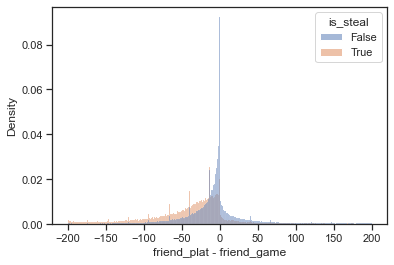

In [35]:
sns.histplot(all_accounts, x = "friend_plat - friend_game", hue = "is_steal", stat="density", common_norm=False)

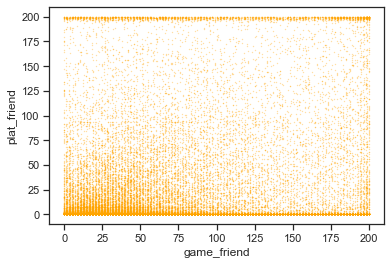

In [36]:
plt.scatter(all_accounts["friend_num_game"][all_accounts["is_steal"]],
            all_accounts["friend_num_plat"][all_accounts["is_steal"]],
            s= 0.1, alpha = 0.5, color = "orange", label ="is_steal")
plt.xlabel("game_friend")
plt.ylabel("plat_friend")
plt.show()

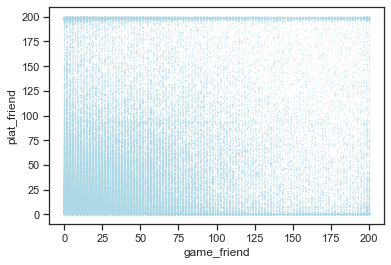

In [37]:
plt.scatter(all_accounts["friend_num_game"][np.logical_not(all_accounts["is_steal"])],
            all_accounts["friend_num_plat"][np.logical_not(all_accounts["is_steal"])],
            s= 0.1, alpha = 0.5, color = "lightblue", label ="not_steal")
plt.xlabel("game_friend")
plt.ylabel("plat_friend")
plt.show()

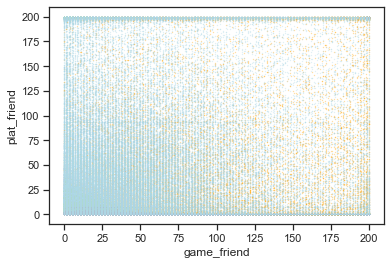

In [38]:
plt.scatter(all_accounts["friend_num_game"][all_accounts["is_steal"]],
            all_accounts["friend_num_plat"][all_accounts["is_steal"]],
            s= 0.1, alpha = 0.5, color = "orange", label ="is_steal")
plt.scatter(all_accounts["friend_num_game"][np.logical_not(all_accounts["is_steal"])],
            all_accounts["friend_num_plat"][np.logical_not(all_accounts["is_steal"])],
            s= 0.1, alpha = 0.5, color = "lightblue", label ="not_steal")
plt.xlabel("game_friend")
plt.ylabel("plat_friend")
plt.show()

## 特征对比

onlinetime


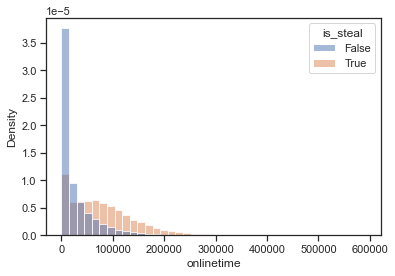

level


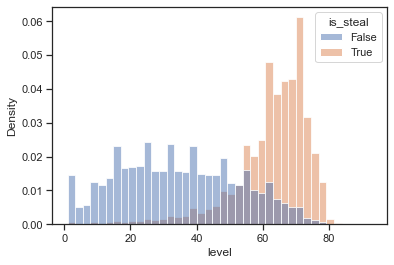

upvote


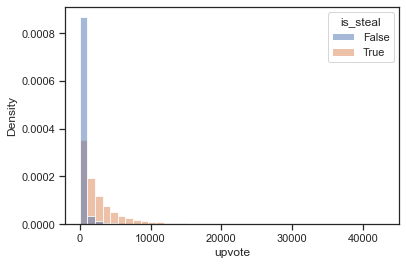

signup_num


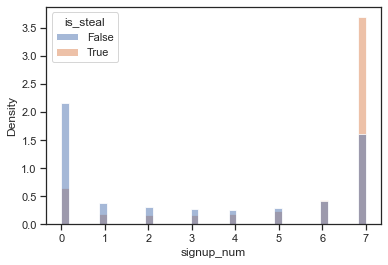

achievement_num


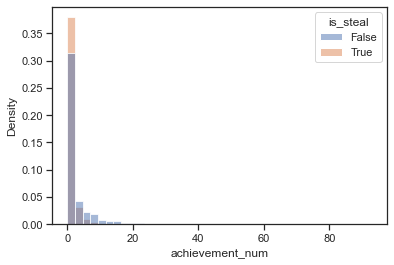

login_num


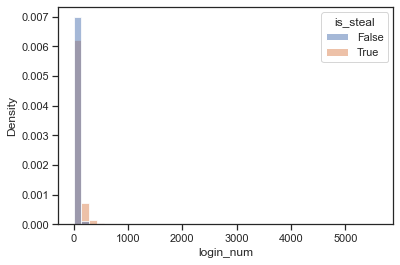

login_days


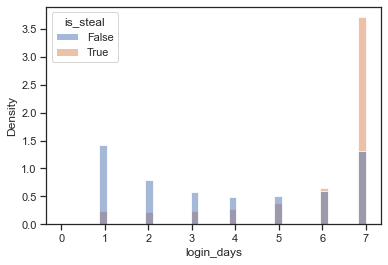

round_num


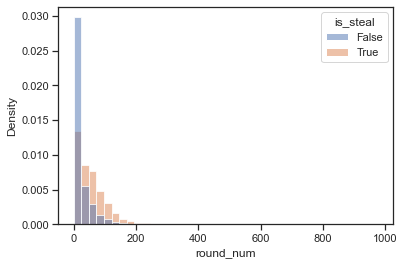

round_squad_num


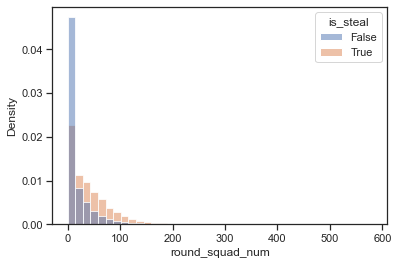

segment


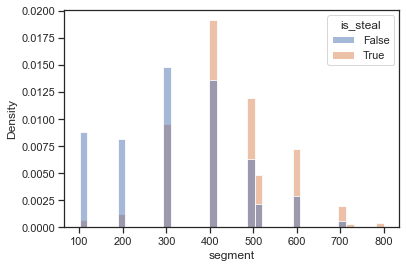

reward_num


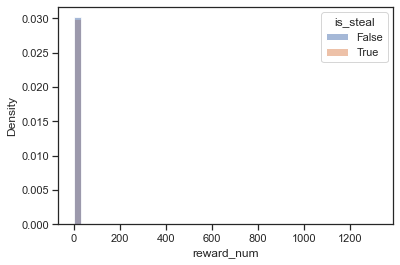

skin_num


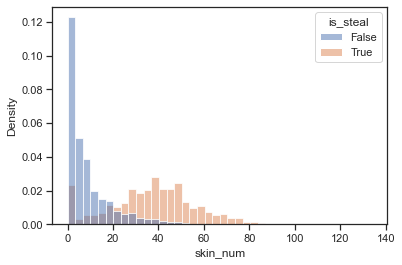

In [50]:
for feature in personal[:-1]:
    print(feature)
    sns.histplot(all_accounts, x = feature, hue = "is_steal", bins = 40, stat = "density" , common_norm=False)
        #,stat="density", common_norm=False)
    plt.show()

被盗账号的 总在线时长`onlinetime`，等级`level`，被点赞数`upvote`，周签到次数`signup_num`，周登录天数`login_days`，皮肤数`skin_num` 的特征分布大于正常账号。

avg_kill_count


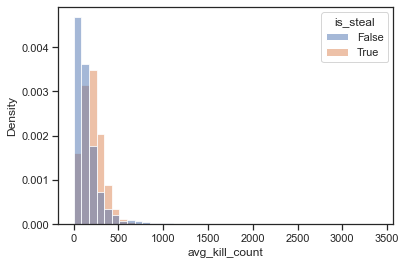

avg_hit_rate


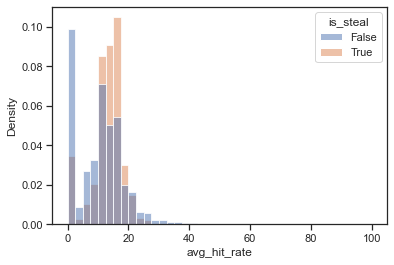

chicken_rate


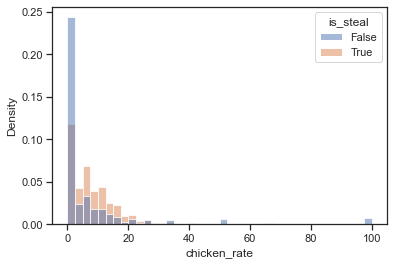

top10_rate


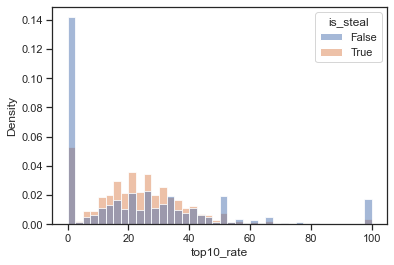

avg_damage


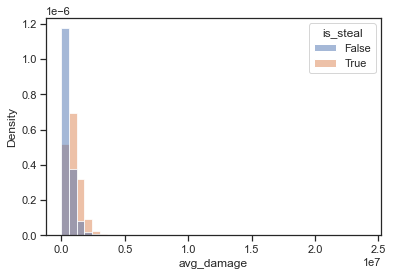

avg_box_num


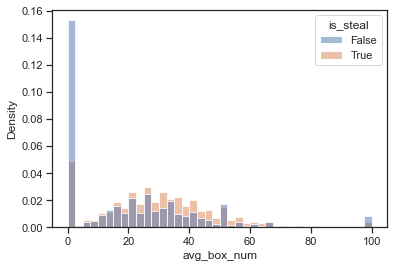

avg_survivaltime


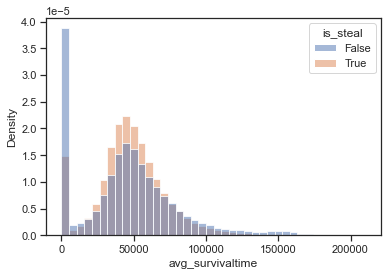

avg_moving


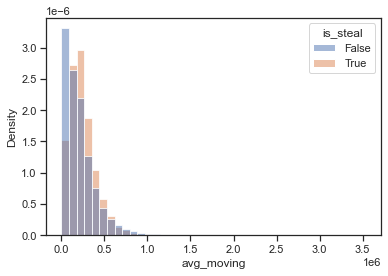

head_shoot_rate


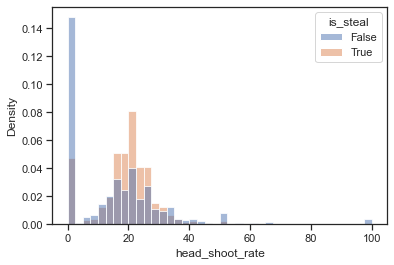

avg_gun_kill


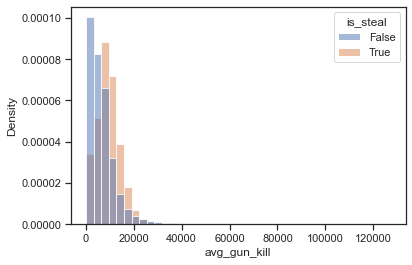

avg_assist


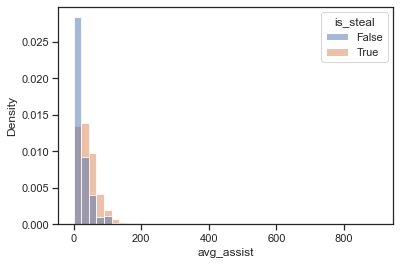

avg_healtimes


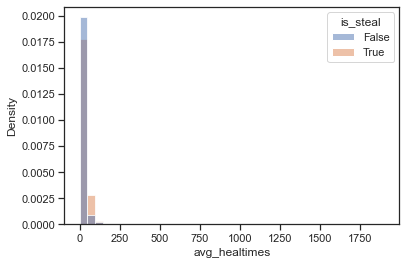

avg_healamount


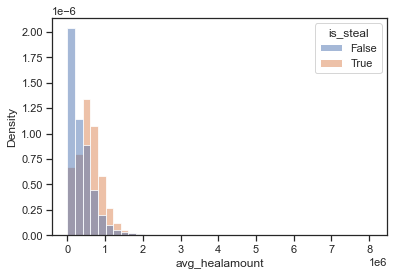

avg_cure


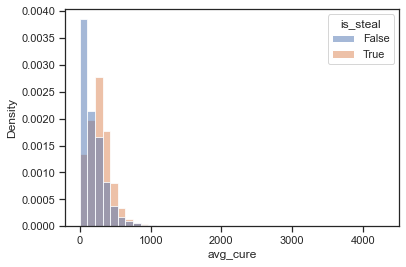

avg_hit_distance


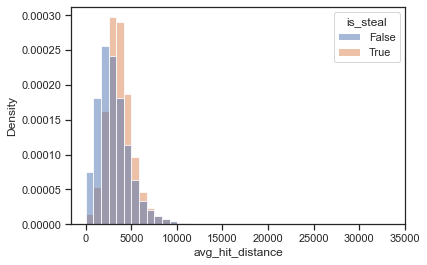

final_score


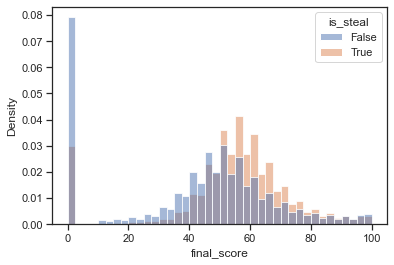

In [51]:
for feature in performance:
    print(feature)
    sns.histplot(all_accounts, x = feature, hue = "is_steal", bins = 40, stat="density", common_norm=False)
    plt.show()

Performance 类的特征，没有显著差异

friend_num_plat


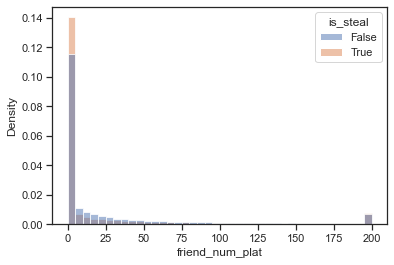

active_plat_num


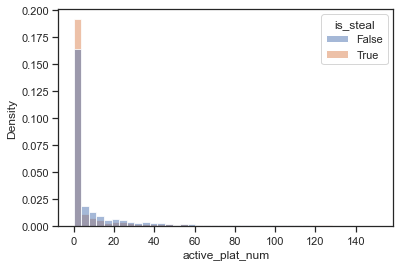

friend_num_game


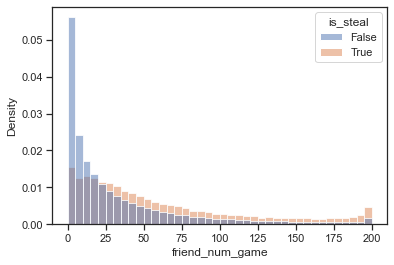

active_game_num


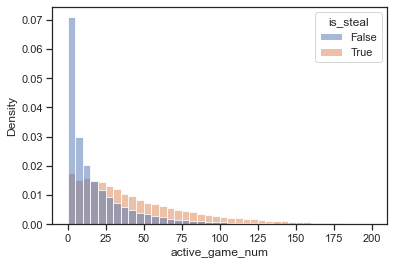

chat_num


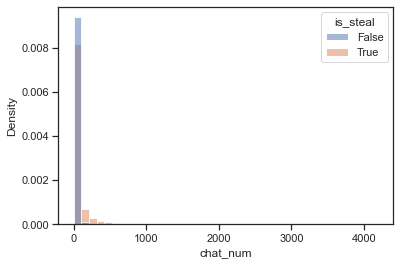

friend_chat_num


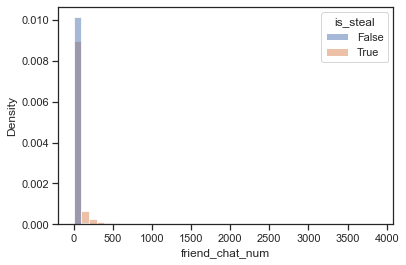

send_gold_num


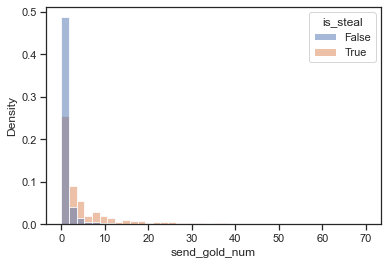

draw_gold_num


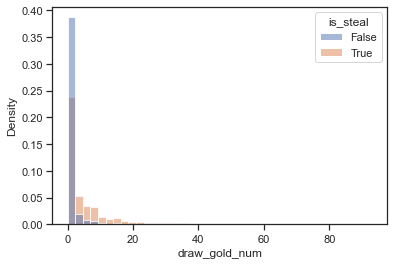

vote_num


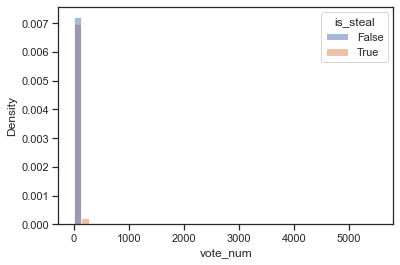

friend_vote_num


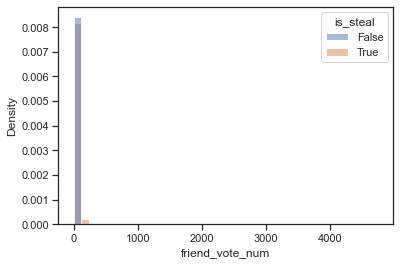

recruit_num


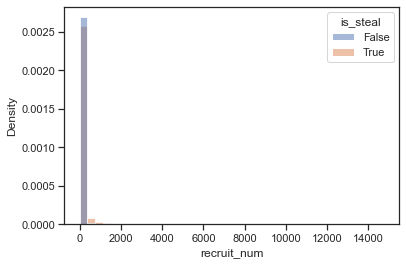

friend_recruit_num


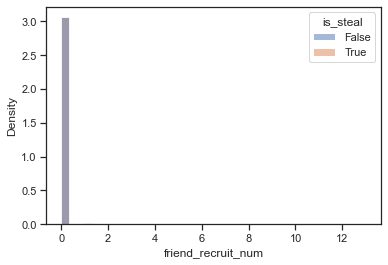

reply_recruit_num


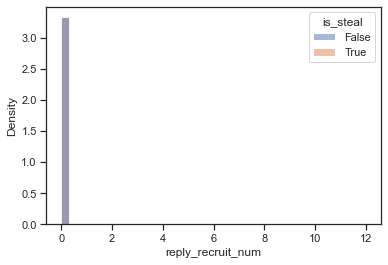

team_num


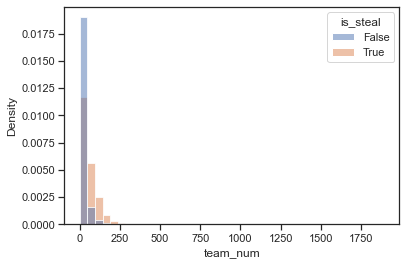

leader_team_num


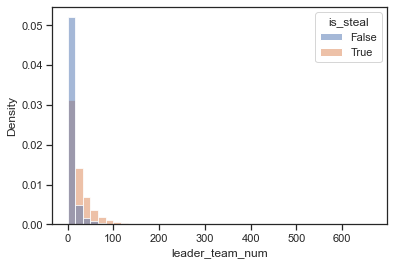

invite_team_num


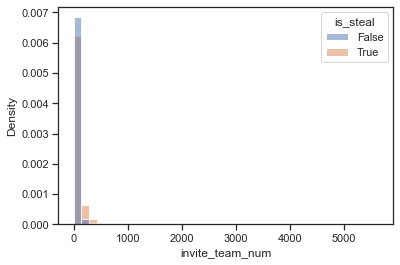

apply_relation_num


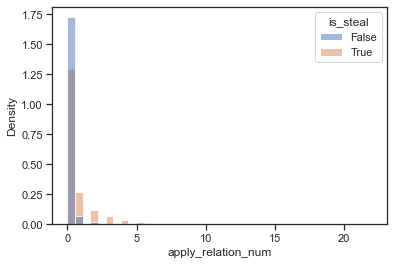

reply_relation_num


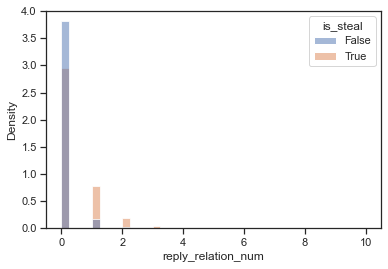

del_friend_num


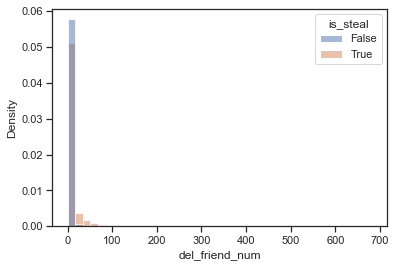

reject_friend_num


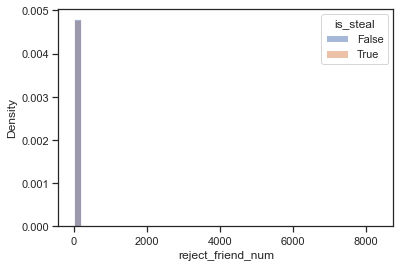

del_friend_apply_num


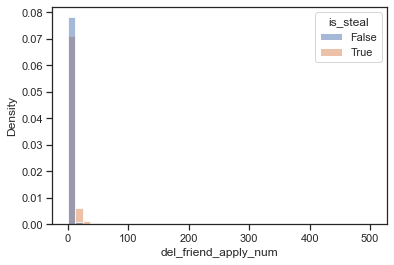

reject_relation_num


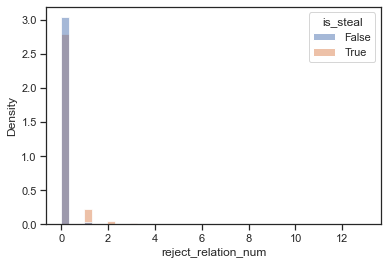

del_intimacy_num


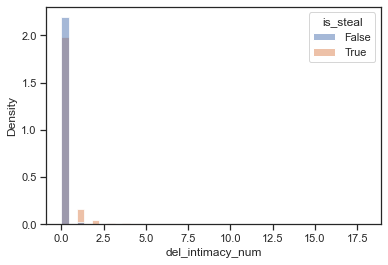

accept_invite_team_num


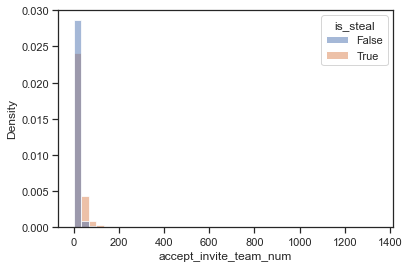

reject_invite_team_num


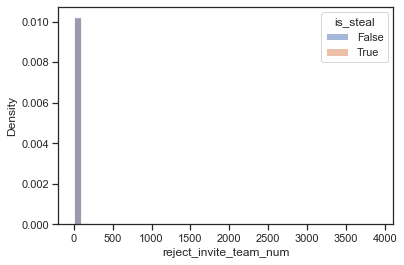

beaccept_invite_team_num


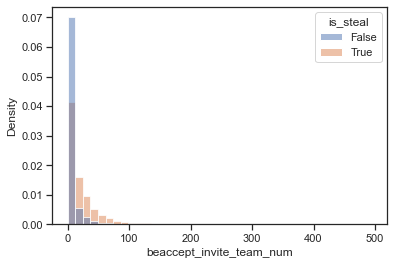

bereject_invite_team_num


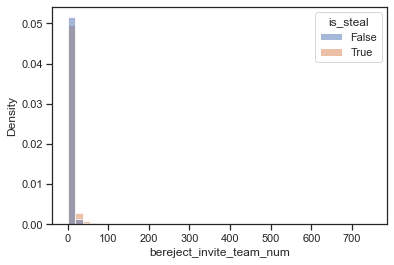

beaccept_apply_team_num


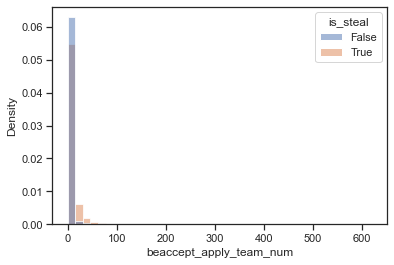

bereject_apply_team_num


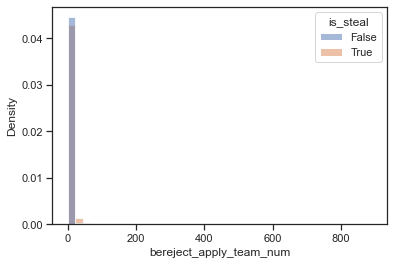

accept_apply_team_num


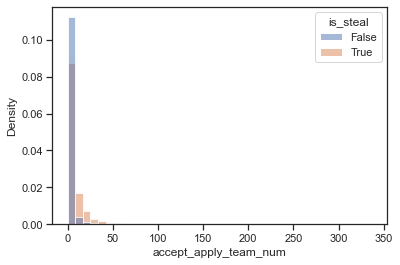

reject_apply_team_num


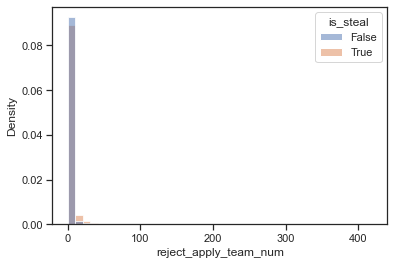

In [52]:
for feature in relations:
    print(feature)
    sns.histplot(all_accounts, x = feature, hue = "is_steal", bins = 40, stat="density", common_norm=False)
    plt.show()

C:\Users\zhixuanshao\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 22909 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\zhixuanshao\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 21451 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\zhixuanshao\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20154 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\zhixuanshao\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\zhixuanshao\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 22909 missing from c

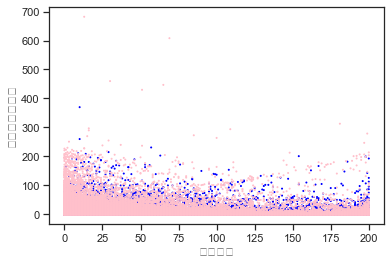

In [53]:
plt.scatter(all_accounts["friend_num_game"], all_accounts["del_friend_num"], s=1, 
            color = ["pink" if s else "blue" for s in all_accounts["is_steal"]])
plt.xlabel("好友人数")
plt.ylabel("已删除好友人数")
plt.savefig("del_friend")

## 好友网络（被盗账号内部）

In [124]:
np.intersect1d(np.array(stealing_accounts_0628["friend_list_game"][3].split(sep="+")),
               stealing_accounts_0628.index,
               assume_unique=True)

array(['5673374166', '5713038787'], dtype=object)

In [127]:
friend_list = stealing_accounts_0628["friend_list_game"].apply(lambda s: np.intersect1d(np.array(str(s).split(sep="+")),
                                                                                        stealing_accounts_0628.index,
                                                                                        assume_unique=True))

In [129]:
friends_info = friend_list[friend_list.apply(lambda x: len(x))>0]

In [131]:
edge_list = []
for i, v in enumerate(friends_info):
    a = friends_info.index[i]
    for b in v:
        edge_list.append([a,b])

In [142]:
g = Graph(directed=False)
# g.add_vertices(pd.concat([df["vroleid"], df["roleb"]]).unique())
g.add_vertices(stealing_accounts_0628.index)

In [143]:
g.add_edges(edge_list)
g.simplify()

In [177]:
g.vs["degree"] = g.degree()
g.vs["pagerank"] = g.pagerank()
for feature in [ "is_vpn", "del_friend_num", "friend_num_game", "onlinetime", "ip_counts", "vclientip"]:
    g.vs[feature] = stealing_accounts_0628[feature]

In [145]:
print(g.summary())
print(g.clusters().summary())
print(g.clusters().giant().summary())

IGRAPH UN-- 56409 8607 -- 
+ attr: degree (v), del_friend_num (v), friend_num_game (v), is_vpn (v), name (v), onlinetime (v), pagerank (v)
Clustering with 56409 elements and 48260 clusters
IGRAPH UN-- 1470 1659 -- 
+ attr: degree (v), del_friend_num (v), friend_num_game (v), is_vpn (v), name (v), onlinetime (v), pagerank (v)


In [146]:
with open("network_20210628_steal_fea_data.pickle", 'wb') as f:
    pickle.dump(g, f)

In [179]:
np.where(np.array(g.clusters().sizes())>= 10)[0]

array([    6,    58,   213,   421,   540,   768,   825,   830,   832,
         880,  1542,  1694,  1771,  1886,  1895,  2023,  2050,  2260,
        2405,  2435,  2465,  2804,  3502,  3743,  4138,  4504,  4608,
        5066,  5221,  5314,  5482,  5612,  5803,  5993,  6615,  8317,
        8904,  9836, 12127], dtype=int64)

In [178]:
g_sub = g.clusters().subgraph(6)

In [189]:
visual_style = {}
visual_style["layout"] = g_sub.layout("auto")
clientip = g_sub.get_vertex_dataframe()["vclientip"].mode()[0]
visual_style["vertex_color"] = ["red" if s else "lightblue" for s in g_sub.vs["is_vpn"]]
#visual_style["vertex_shape"] = ["rectangle" if s else "circle" for s in g_sub.vs["is_vpn"]]
visual_style["vertex_shape"] = ["rectangle" if s>1 else "circle" for s in g_sub.vs["ip_counts"]]

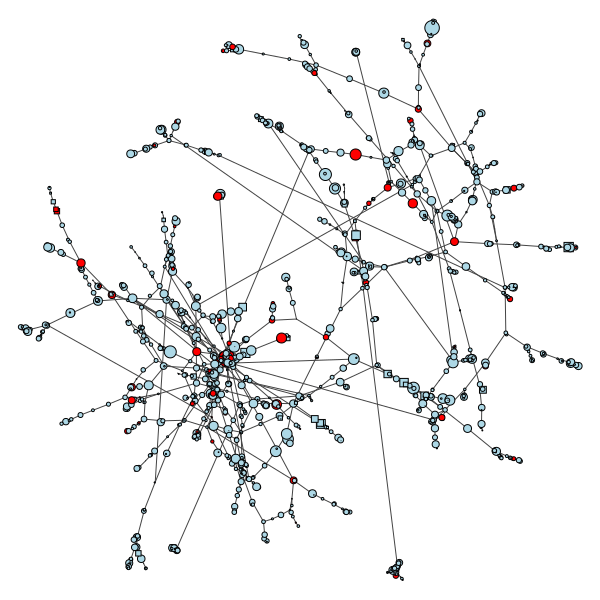

In [194]:
plot(g_sub, 
     "steal_cluster_6.png",
     vertex_size = np.minimum(np.array(g_sub.vs["onlinetime"])*3e-5,30), **visual_style)

## 好友网络

In [54]:
g = Graph(directed=False)
g.add_vertices(all_accounts.index)

In [55]:
friend_list = all_accounts["friend_list_game"].apply(lambda s: np.intersect1d(np.array(str(s).split(sep="+")),
                                                                                        all_accounts.index,
                                                                                        assume_unique=True))

In [56]:
friends_info = friend_list[friend_list.apply(lambda x: len(x))>0]

In [57]:
edge_list = []
for i, v in enumerate(friends_info):
    a = friends_info.index[i]
    for b in v:
        edge_list.append([a,b])

In [58]:
g.add_edges(edge_list)
g.simplify()

In [21]:
g.vs["degree"] = g.degree()
g.vs["pagerank"] = g.pagerank()
for feature in [ "is_vpn", "del_friend_num", "friend_num_game", "onlinetime", "ip_counts", "vclientip", "is_steal", "is_in_giant_cluster_0628"]:
    g.vs[feature] = all_accounts[feature]

In [22]:
print(g.summary())
print(g.clusters().summary())
print(g.clusters().giant().summary())

IGRAPH UN-- 254394 35433 -- 
+ attr: degree (v), del_friend_num (v), friend_num_game (v), ip_counts (v), is_in_giant_cluster_0628 (v), is_steal (v), is_vpn (v), name (v), onlinetime (v), pagerank (v), vclientip (v)
Clustering with 254394 elements and 220205 clusters
IGRAPH UN-- 8792 9557 -- 
+ attr: degree (v), del_friend_num (v), friend_num_game (v), ip_counts (v), is_in_giant_cluster_0628 (v), is_steal (v), is_vpn (v), name (v), onlinetime (v), pagerank (v), vclientip (v)


In [60]:
with open("network_20210607_all_accounts_supplement.pickle", 'wb') as f:
    pickle.dump(g, f)

In [19]:
with open("network_20210607_all_accounts_supplement.pickle", 'rb') as f:
    g = pickle.load(f)

In [23]:
np.where(np.array(g.clusters().sizes())>= 20)[0]

array([    17,   2712,   3144,   3511,   3672,   3994,   4742,   4744,
         4883,   5280,   5406,   5450,   5778,   5963,   6261,   6979,
         7267,   7307,   8582,   9029,   9605,   9690,   9902,  10249,
        10468,  12149,  12577,  17617,  18033,  19135,  22689,  32307,
       106134, 139004, 180253], dtype=int64)

In [24]:
id = 17
g_sub = g.clusters().subgraph(id)

In [25]:
print(g_sub.summary())
print(g_sub.transitivity_undirected())
print(g_sub.transitivity_avglocal_undirected())

IGRAPH UN-- 8792 9557 -- 
+ attr: degree (v), del_friend_num (v), friend_num_game (v), ip_counts (v), is_in_giant_cluster_0628 (v), is_steal (v), is_vpn (v), name (v), onlinetime (v), pagerank (v), vclientip (v)
0.05788111170810335
0.07565159913526948


In [26]:
visual_style = {}
visual_style["layout"] = g_sub.layout("auto")
visual_style["vertex_color"] = ["red" if s else "lightblue" for s in g_sub.vs["is_steal"]]
#visual_style["vertex_shape"] = ["rectangle" if s else "circle" for s in g_sub.vs["is_vpn"]]
visual_style["vertex_shape"] = ["rectangle" if s else "circle" for s in g_sub.vs["is_in_giant_cluster_0628"]]

In [27]:
plot(g_sub, 
     "steal_cluster_supplement_0607_" +str(id) + ".png",
     vertex_size = np.minimum(np.array(g_sub.vs["onlinetime"])*3e-5,30), **visual_style)

In [33]:
g_steal = g.induced_subgraph(np.where(g.get_vertex_dataframe()["is_steal"])[0])
g_steal.summary()

'IGRAPH UN-- 54626 8654 -- \n+ attr: degree (v), del_friend_num (v), friend_num_game (v), ip_counts (v), is_in_giant_cluster_0628 (v), is_steal (v), is_vpn (v), name (v), onlinetime (v), pagerank (v), vclientip (v)'

In [34]:
g_normal = g.induced_subgraph(np.where(np.logical_not(g.get_vertex_dataframe()["is_steal"]))[0])
g_normal.summary()

'IGRAPH UN-- 199768 16683 -- \n+ attr: degree (v), del_friend_num (v), friend_num_game (v), ip_counts (v), is_in_giant_cluster_0628 (v), is_steal (v), is_vpn (v), name (v), onlinetime (v), pagerank (v), vclientip (v)'

In [35]:
g.ecount() - g_steal.ecount() - g_normal.ecount()

10096

In [30]:
g_giant_cluster = g.induced_subgraph(np.where(g.get_vertex_dataframe()["is_in_giant_cluster_0628"])[0])

In [40]:
print(g_giant_cluster.summary())
print(g_giant_cluster.clusters().summary())
print(g_giant_cluster.transitivity_undirected())
print(g_giant_cluster.transitivity_avglocal_undirected())

IGRAPH UN-- 1449 1012 -- 
+ attr: degree (v), del_friend_num (v), friend_num_game (v), ip_counts (v), is_in_giant_cluster_0628 (v), is_steal (v), is_vpn (v), name (v), onlinetime (v), pagerank (v), vclientip (v)
Clustering with 1449 elements and 533 clusters
0.11001642036124795
0.15329145042338155


In [38]:
visual_style = {}
visual_style["layout"] = g_giant_cluster.layout("auto")
#visual_style["vertex_color"] = ["red" if s else "lightblue" for s in g_sub.vs["is_vpn"]]
#visual_style["vertex_shape"] = ["rectangle" if s else "circle" for s in g_sub.vs["is_vpn"]]
#visual_style["vertex_shape"] = ["rectangle" if s>1 else "circle" for s in g_sub.vs["ip_counts"]]

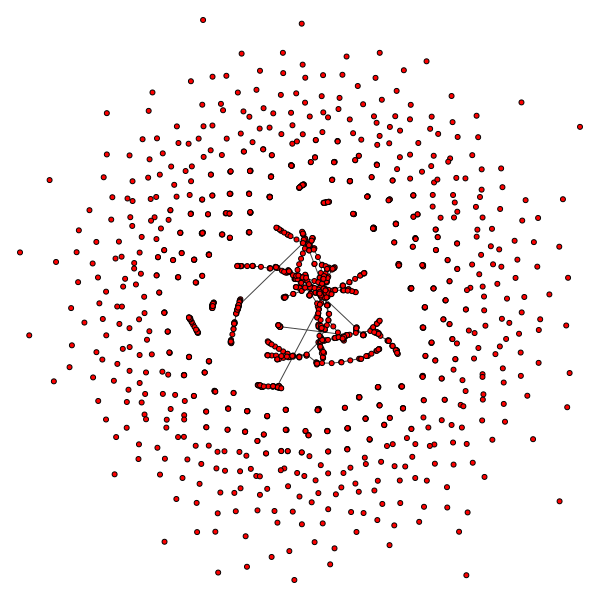

In [39]:
plot(g_giant_cluster, vertex_size = 5)

In [37]:
with open("g_sub_giant_cluster_0607.pickle", 'wb') as f:
    pickle.dump(g_giant_cluster, f)